In [19]:
%pylab inline
import glob
import numpy as np
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


In [20]:
# PLot cdf of gamma distribution posterior estimates for real data

def main():
    print('Running main')
    
    folder = 't1'
    fig_num = 0
    pers = [2,3,4]
    color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
    for per in pers:
        file_list = glob.glob('./results/results/%s/per_%d_*.txt'%(folder, per) )
        file_list.sort() 
        base_plot = ''
        cum_dic = {}
        for filename in file_list:
            fig_num = fig_num + 1

            results_file = open(filename, 'r')
            lines = results_file.readlines()
            if len(lines) > 15:
                line = lines[2]
                info = line.strip().split(': ')
                motif = info[2]
                if motif != '1.0' and motif != '0.0':
                    line = lines[11]
                    info = line.strip().split(',')
                    k = float(info[0])
                    theta = float(info[1])

                    print(motif)

                    s = [] # List of s values drawn from gamma distribution
                    num_sims = 10000
                    for i in range(0, num_sims):
                        s_val = np.random.gamma(k, theta)
                        if s_val > 0.1:
                            s_val = 0.1

                        s.append(s_val)
                    
                    bins_list = [0]
                    exponents = [10**-5, 10**-4, 10**-3, 10**-2]
                    for j in exponents:
                        for i in np.arange(1,10,0.1):
                            bins_list.append(i*j)
                            
                    bins_list.append(0.1)
                    bins_list.append(1)
                    
                    values, base = np.histogram(s, bins=bins_list)# [0,10**-5,10**-4,10**-3,10**-2,10**-1,1]#[0,10**-5,10**-4,10**-3,10**-2,10**-1,1]
                    
                    cumulative = np.cumsum(values)
                    
                    cum_dic[motif] = cumulative
                    base_plot = base
                    
        # Plot CDF
        color_num = -1
        fig_num = fig_num + 1
        plt.figure(fig_num)
        for elem in cum_dic:
            color_num = color_num + 1
            plt.plot(base_plot[:-1], cum_dic[elem], label = elem, color=color_list[color_num])
            
        plt.xlim(10**-5, 0.1)
        plt.xscale('log')
        plt.title('Period %d'%(per))
        plt.xlabel('s')
        plt.legend()
        
        yticks([0, 2000, 4000, 6000, 8000, 10000], ['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        plt.ylabel('Cumulative Frequency')
        plt.show()

Running main
AC
AG


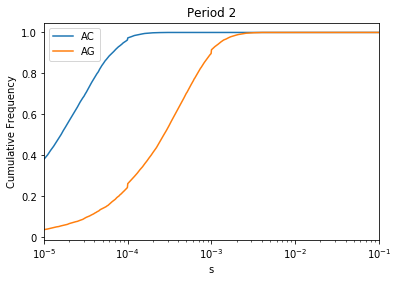

AAC
AAG
ACC
AGC
AGG
ATC
CCG


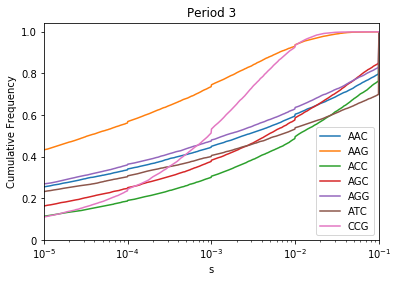

AAAC
AAAG
AAAT
AAGG
AATC
AATG
ATCC


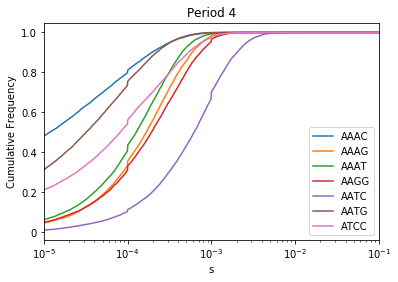

CPU times: user 2.82 s, sys: 40.8 ms, total: 2.86 s
Wall time: 2.85 s


In [21]:
%%time
if __name__ == '__main__':
    main()